# Initial Steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

Loading Data

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


# Preparing Data For Data Driven Forecasting

## Importing Required Libraries

## Creating MAPE Function

In [3]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Splitting Data

In [4]:
Train = df.drop(df.tail(12).index)
Train

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


In [5]:
Test = df.tail(12)
Test

,quantity
date,
2021-12-01,13576
2022-01-01,15499
2022-02-01,14687
2022-03-01,15324
2022-04-01,14187
2022-05-01,14642
2022-06-01,14441
2022-07-01,15015
2022-08-01,15011


# Model Building

## 1. Moving Average

In [6]:
# Moving Average for the time series
mv_pred = df["quantity"].rolling(12).mean()
mv_pred.tail(12)
MAPE(mv_pred.tail(12), Test.quantity)

3.921720218730711

## 2. Simple Exponential Smoothing

In [7]:
ses_model = SimpleExpSmoothing(Train["quantity"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.quantity)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.692896445147157

## 3. Holt's method 

In [8]:
hw_model = Holt(Train["quantity"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


15.566496264876754

## 4. Holts Winter Exponential Smoothing with Additive Seasonality & Additive Trend

In [9]:
hwe_model_add_add = ExponentialSmoothing(Train["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.0022120551975993294

## 5. Holts Winter Exponential Smoothing with Multiplicative Seasonality & Additive Trend

In [10]:
hwe_model_mul_add = ExponentialSmoothing(Train["quantity"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.5768730780730268

# Forecasting

## 1. Getting Data For Forecasting

In [11]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Allot/plastic/plastic_data_to_forecast.csv"

In [12]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2 = df2.set_index('date')
df2

""
date
2022-12-01
2023-01-01
2023-02-01
2023-03-01
2023-04-01
2023-05-01
2023-06-01
2023-07-01
2023-08-01


## 3. Best Model

In [13]:
model_full = ExponentialSmoothing(df["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## 4. Forecasting

In [14]:
pred_new = pd.Series(model_full.predict(start = df2.index[0], end = df2.index[-1]))
pred_new

2022-12-01    14804.333636
2023-01-01    16727.333372
2023-02-01    15915.333476
2023-03-01    16552.333150
2023-04-01    15415.333641
2023-05-01    15869.666736
2023-06-01    15669.000067
2023-07-01    16243.333375
2023-08-01    16238.666744
2023-09-01    15861.333356
2023-10-01    16505.333618
2023-11-01    17557.666557
Freq: MS, dtype: float64

In [15]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

,forecasted_quantity
date,
2022-12-01,14804.333636
2023-01-01,16727.333372
2023-02-01,15915.333476
2023-03-01,16552.333150
2023-04-01,15415.333641
2023-05-01,15869.666736
2023-06-01,15669.000067
2023-07-01,16243.333375
2023-08-01,16238.666744


## 5. Finding Residuals

In [16]:
full_res = df.quantity - model_full.predict(start = df.index[0], end = df.index[-1])
full_res

date
2019-12-01    0.166453
2020-01-01    0.166717
2020-02-01    0.166613
2020-03-01    0.166939
2020-04-01    0.166449
2020-05-01   -0.166647
2020-06-01   -0.499978
2020-07-01    0.166714
2020-08-01   -0.166655
2020-09-01    0.166733
2020-10-01    0.166471
2020-11-01   -0.166468
2020-12-01   -0.000244
2021-01-01    0.000020
2021-02-01   -0.000083
2021-03-01    0.000242
2021-04-01   -0.000248
2021-05-01   -0.333344
2021-06-01    0.333325
2021-07-01    0.000018
2021-08-01   -0.333351
2021-09-01    0.000037
2021-10-01   -0.000225
2021-11-01   -0.333165
2021-12-01   -0.166940
2022-01-01   -0.166676
2022-02-01   -0.166779
2022-03-01   -0.166454
2022-04-01   -0.166944
2022-05-01    0.499960
2022-06-01    0.166629
2022-07-01   -0.166679
2022-08-01    0.499952
2022-09-01   -0.166660
2022-10-01   -0.166921
2022-11-01    0.500139
dtype: float64

## 6. ACF Plot on Residuals

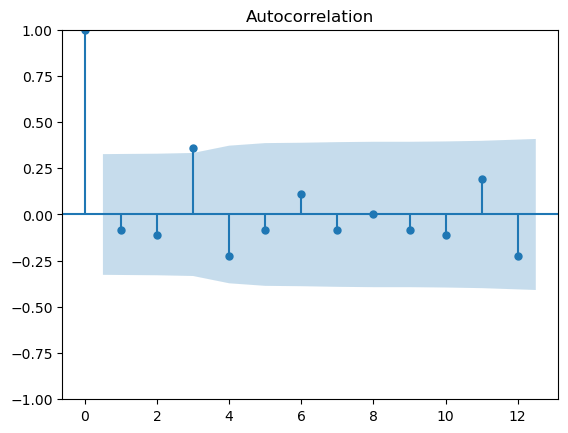

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


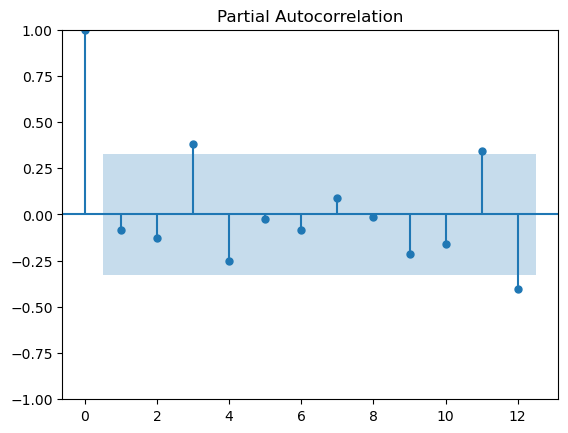

In [18]:
tsa_plots.plot_pacf(full_res, lags=12);

## 8. Autoregression Model

In [19]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[3])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const   -0.013018
y.L3     0.424990
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0    -0.083847
1    -0.083958
2     0.199536
3    -0.048652
4    -0.048700
5     0.071783
6    -0.033695
7    -0.033715
8     0.017489
9    -0.027338
10   -0.027347
11   -0.005586
dtype: float64

In [21]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

,forecasted_quantity,Residuals
date,,
2022-12-01,14804.333636,-0.083847
2023-01-01,16727.333372,-0.083958
2023-02-01,15915.333476,0.199536
2023-03-01,16552.333150,-0.048652
2023-04-01,15415.333641,-0.048700
2023-05-01,15869.666736,0.071783
2023-06-01,15669.000067,-0.033695
2023-07-01,16243.333375,-0.033715
2023-08-01,16238.666744,0.017489


In [22]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

,forecasted_quantity,Residuals,final_forecast
date,,,
2022-12-01,14804.333636,-0.083847,14804.249790
2023-01-01,16727.333372,-0.083958,16727.249414
2023-02-01,15915.333476,0.199536,15915.533012
2023-03-01,16552.333150,-0.048652,16552.284498
2023-04-01,15415.333641,-0.048700,15415.284941
2023-05-01,15869.666736,0.071783,15869.738519
2023-06-01,15669.000067,-0.033695,15668.966373
2023-07-01,16243.333375,-0.033715,16243.299660
2023-08-01,16238.666744,0.017489,16238.684233


# Forecasting Result

<AxesSubplot:xlabel='date'>

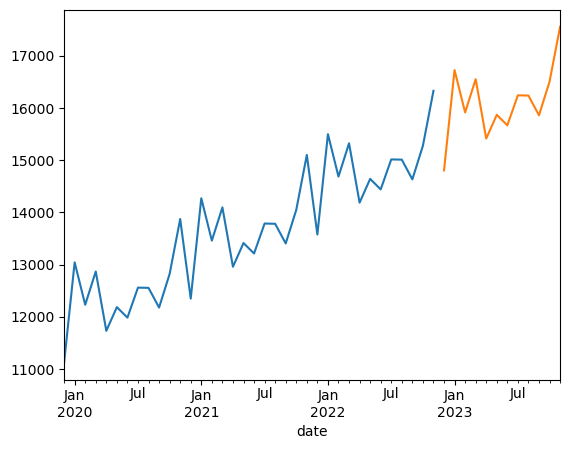

In [23]:
df.quantity.plot()
df3.final_forecast.plot()

# Saving Forecasted Data

In [24]:
df3.to_csv('data_driven_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Allot\\plastic'